In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv(r"F:\Ruet academic\6th Semester\6th Sem Myself\Case Study\Jupyter\new_full_data.csv", parse_dates=['Month'], index_col=['Month'])

In [4]:
df.head()

,Quantity
Month,
2019-01-31,38
2019-02-28,18
2019-03-31,17
2019-04-30,58
2019-05-31,193


<Axes: xlabel='Month'>

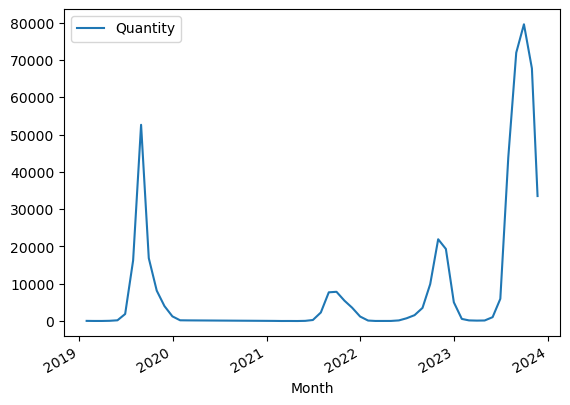

In [6]:
df.plot()

In [7]:
import statsmodels.api as sm

In [10]:
from statsmodels.tsa.stattools import adfuller

In [11]:
adftest=adfuller(df)

In [12]:
print('pvalue of adfuller test is: ', adftest[1])

pvalue of adfuller test is:  0.004330794077982012


In [13]:
len(df)

59

In [36]:
train=df[:25]
test=df[25:]

In [37]:
import itertools

In [38]:
p=range(0,8)
q=range(0,8)
d=range(0,2)

In [39]:
pdq_combination=list(itertools.product(p,d,q))

In [40]:
pdq_combination

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 0, 5),
 (0, 0, 6),
 (0, 0, 7),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 1, 5),
 (0, 1, 6),
 (0, 1, 7),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 0, 5),
 (1, 0, 6),
 (1, 0, 7),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 1, 5),
 (1, 1, 6),
 (1, 1, 7),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 0, 5),
 (2, 0, 6),
 (2, 0, 7),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 1, 5),
 (2, 1, 6),
 (2, 1, 7),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 0, 5),
 (3, 0, 6),
 (3, 0, 7),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3, 1, 3),
 (3, 1, 4),
 (3, 1, 5),
 (3, 1, 6),
 (3, 1, 7),
 (4, 0, 0),
 (4, 0, 1),
 (4, 0, 2),
 (4, 0, 3),
 (4, 0, 4),
 (4, 0, 5),
 (4, 0, 6),
 (4, 0, 7),
 (4, 1, 0),
 (4, 1, 1),
 (4, 1, 2),
 (4, 1, 3),
 (4, 1, 4),
 (4, 1, 5),
 (4, 1, 6),
 (4, 1, 7),
 (5, 0, 0),
 (5, 0, 1),
 (5, 0, 2),
 (5,

In [41]:
len(pdq_combination)

128

In [42]:
rmse=[]
order1=[]

In [43]:
for pdq in pdq_combination:
    try:
        model=ARIMA(train,order=pdq).fit()
        pred=model.predict(start=len(train),end=(len(df)-1))
        error=np.sqrt(mean_squared_error(test,pred))
        order1.append(pdq)
        rmse.append(error)
        
    except:
        continue

In [44]:
results=pd.DataFrame(index=order1,data=rmse, columns=['RMSE'])

In [45]:
results.head()

,RMSE


In [46]:
df.head()

,Quantity
Month,
2019-01-31,38
2019-02-28,18
2019-03-31,17
2019-04-30,58
2019-05-31,193


In [47]:
train.head()

,Quantity
Month,
2019-01-31,38
2019-02-28,18
2019-03-31,17
2019-04-30,58
2019-05-31,193


In [48]:
test.head()

,Quantity
Month,
2021-02-28,9
2021-03-31,13
2021-04-30,3
2021-05-31,43
2021-06-30,272


In [49]:
len(train)

25

In [50]:
len(test)

34